## Varisara Burapachaisri, Adam Horn
## Health Data Mining Project 2018


## Step 1: Import Data
### Perform get_dummies to One-Hot-Encode sub-categories, expanding the number of categories from 23 to 2574.

In [1]:
# import data using numpy and pandas 

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
import os
train = pd.read_csv("mushrooms.csv", sep=",", engine='python')
feature_name = train.columns[1:23].tolist()
print(feature_name)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [2]:
# use get_dummies to convert categorical data into binary
# concatenate target and features under the same variable

appended_data = []
for x in range(1,23):
    for i in feature_name:
        test = pd.get_dummies(train.iloc[:, x], prefix = i) 
        appended_data.append(test)
appended_data = pd.concat(appended_data, axis=1)  
target = train.iloc[:,0]
a = pd.Series.to_frame(target)
print(type(a))

print(type(appended_data))
print(a.shape, appended_data.shape)
final = pd.concat((a, appended_data), axis = 1)
print(final)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(8124, 1) (8124, 2574)
     class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0        p            0            0            0            0            0   
1        e            0            0            0            0            0   
2        e            1            0            0            0            0   
3        p            0            0            0            0            0   
4        e            0            0            0            0            0   
5        e            0            0            0            0            0   
6        e            1            0            0            0            0   
7        e            1            0            0            0            0   
8        p            0            0            0            0            0   
9        e            1            0            0            0            0   
10       e            0         

In [3]:
# convert target of poisonous and edible into binary outcomes of 1 and 0

import numpy as np
a = a.replace(["p", "e"],[1,0])
a.astype(int)

,class
0,1
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [14]:
final = pd.concat((a, appended_data), axis = 1)
print(final)

      class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0         1            0            0            0            0            0   
1         0            0            0            0            0            0   
2         0            1            0            0            0            0   
3         1            0            0            0            0            0   
4         0            0            0            0            0            0   
5         0            0            0            0            0            0   
6         0            1            0            0            0            0   
7         0            1            0            0            0            0   
8         1            0            0            0            0            0   
9         0            1            0            0            0            0   
10        0            0            0            0            0            0   
11        0            0            0   

In [5]:
# prepare data to input into heatmap visualization
# create color dataframe and visualize first 5 rows using head() 

color_features = []
for i in train.columns:
    if 'color' in i:
        color_features.append(i)

data_color = train[color_features]
data_color.head()

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,n,k,w,w,w,k
1,y,k,w,w,w,n
2,w,n,w,w,w,n
3,w,n,w,w,w,k
4,g,k,w,w,w,n


In [15]:
# import LabelEncoder to convert categorical into numerical
from sklearn.preprocessing import LabelEncoder
# Store all unique categories
ListToEncode = pd.Series(data_color.values.ravel()).unique()

# Transform by sklearn Labelencoder
EncodedList = LabelEncoder().fit_transform(ListToEncode)

# To store encoding, define a dictionary "encodedict"
encodedict = {}
for i in range(0, len(EncodedList)):
    encodedict.update({ListToEncode[i]:EncodedList[i]})

# Create encoded dataframe using dictionary
for i in range(len(data_color.columns)):
    for j in range(len(data_color['cap-color'].values)):
        data_color.values[j][i] =  encodedict[data_color.values[j][i]]
data_color.head()  

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,6,5,11,11,11,5
1,12,5,11,11,11,6
2,11,6,11,11,11,6
3,11,6,11,11,11,5
4,3,5,11,11,11,6


In [16]:
# change to float values for latter use in pearson correlation and heatmap plot
data_corr = data_color.astype(float).corr()
data_corr

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
cap-color,1.000000,0.097253,0.089248,0.093015,-0.001314,-0.233534
gill-color,0.097253,1.000000,-0.058458,-0.074540,-0.107792,-0.474733
stalk-color-above-ring,0.089248,-0.058458,1.000000,0.509303,0.079030,0.225851
stalk-color-below-ring,0.093015,-0.074540,0.509303,1.000000,0.077198,0.209170
veil-color,-0.001314,-0.107792,0.079030,0.077198,1.000000,0.036781
spore-print-color,-0.233534,-0.474733,0.225851,0.209170,0.036781,1.000000


In [17]:
# check the shape, set the feature and target columns
# check unique values within target and feature

features = final.iloc[:, 1:2575]
target = final.iloc[:,0]
print('train:', final.shape)
print('\nNumber of samples per class(all):\n', 
      np.asarray(np.unique(final.iloc[:,0], return_counts=True)).T)
print('Target names:', final['class'].unique())
print('Feature names:', final.columns[1:2575].tolist())
feature_namess = final.columns[1:2575].tolist()
target_name = train['class'].unique()

train: (8124, 2575)

Number of samples per class(all):
 [[   0 4208]
 [   1 3916]]
Target names: [1 0]
Feature names: ['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_b', 'cap-surface_c', 'cap-surface_f', 'cap-surface_k', 'cap-surface_s', 'cap-surface_x', 'cap-color_b', 'cap-color_c', 'cap-color_f', 'cap-color_k', 'cap-color_s', 'cap-color_x', 'bruises_b', 'bruises_c', 'bruises_f', 'bruises_k', 'bruises_s', 'bruises_x', 'odor_b', 'odor_c', 'odor_f', 'odor_k', 'odor_s', 'odor_x', 'gill-attachment_b', 'gill-attachment_c', 'gill-attachment_f', 'gill-attachment_k', 'gill-attachment_s', 'gill-attachment_x', 'gill-spacing_b', 'gill-spacing_c', 'gill-spacing_f', 'gill-spacing_k', 'gill-spacing_s', 'gill-spacing_x', 'gill-size_b', 'gill-size_c', 'gill-size_f', 'gill-size_k', 'gill-size_s', 'gill-size_x', 'gill-color_b', 'gill-color_c', 'gill-color_f', 'gill-color_k', 'gill-color_s', 'gill-color_x', 'stalk-shape_b', 'stalk-shape_c', 'stalk-

## Step 2: Split Training and Testing Data

In [18]:
# using train_test_split function, split data into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6093, 2574) (2031, 2574) (6093,) (2031,)


## Step 3: Preprocessing 

In [19]:
# it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Step 4: Dimensionality Reduction - PCA

(6093, 2574) (2031, 2574)


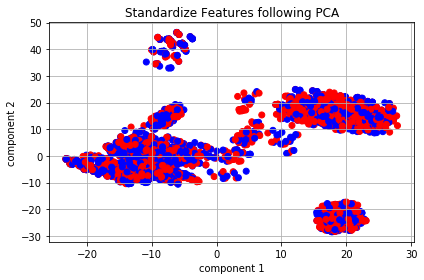

In [20]:
# convert a set of potentially correlated variables into linearly uncorrelated variables called principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_scaler)
X_test_pca = pca.transform(X_test_scaler)
print(X_train_pca.shape, X_test_pca.shape)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca_3 = PCA(n_components=None)

Comp1 = X_train_pca[:, 0]
Comp2 = X_train_pca[:, 1]


plt.scatter(Comp1, Comp2, c=('red', 'blue'))
plt.title('Standardize Features following PCA')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.grid()
plt.tight_layout()
plt.show()

In [21]:
#calculate variance ratios

from sklearn.decomposition import PCA as pca
import seaborn as sb
covar_matrix = pca(n_components = 80)
covar_matrix.fit(features)
variance = covar_matrix.explained_variance_ratio_ 

#cumulative sum of variance explained with [n] features

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var[0:100] 

array([16.8, 30.7, 40.4, 46.7, 50.7, 54.4, 57.5, 60.3, 63. , 65.1, 67.1,
       69. , 70.8, 72.5, 74. , 75.5, 77. , 78.4, 79.7, 80.9, 82. , 83.1,
       84.1, 85. , 85.9, 86.8, 87.6, 88.4, 89.1, 89.8, 90.5, 91.1, 91.7,
       92.3, 92.8, 93.3, 93.8, 94.3, 94.7, 95.1, 95.5, 95.9, 96.3, 96.6,
       96.9, 97.2, 97.5, 97.7, 97.9, 98.1, 98.3, 98.5, 98.6, 98.7, 98.8,
       98.9, 99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9])

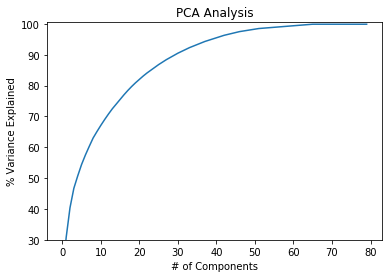

In [22]:
# plot PCA Analysis results

import matplotlib.pyplot as plt
plt.ylabel('% Variance Explained')
plt.xlabel('# of Components')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [23]:
pca_modified=PCA(n_components=64)
dim_feat = pca_modified.fit_transform(features)
print(dim_feat)

[[-4.67280415e+00 -4.44131523e+00  3.76402673e+00 ... -4.43645136e-01
  -3.01144859e-01 -3.19967306e-01]
 [-6.76232633e+00 -7.69951204e-01  5.01018425e+00 ... -1.44320397e-01
  -1.60163159e-01 -2.70079066e-01]
 [-7.14859122e+00 -1.91718850e+00  4.00172910e+00 ...  2.18008865e-01
   7.09702327e-02  3.15099729e-01]
 ...
 [-1.34998007e+00 -1.53007808e+00  1.28828763e+00 ...  6.09478017e-01
  -8.54030537e-01 -4.82193731e-01]
 [ 9.05453347e+00 -7.37878873e+00 -5.42918100e-01 ...  8.51078333e-02
   4.29317838e-02  6.82610529e-03]
 [-1.16930748e+00 -1.46478005e+00  1.69731139e+00 ...  3.84883859e-01
  -3.31192734e-01  1.21608118e-02]]


## Step 5: K-Means Clustering (Unsupervised learning)

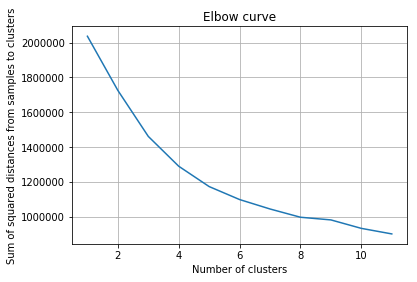

0.8921713441654358
0.48535204332840964


In [24]:
# perform unsupervised learning using K-Means Clustering
# use elbow curve method : sum of squared distances

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

estimator = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=0).fit(features)

estimator2 = KMeans(n_clusters=2, init='random', n_init=1, random_state=0).fit(features)

distorsions = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    distorsions.append(kmeans.inertia_)
plt.plot(range(1, 12), distorsions)
plt.grid(True) 
plt.title('Elbow curve')
plt.ylabel('Sum of squared distances from samples to clusters')
plt.xlabel('Number of clusters')
plt.show()


print(accuracy_score(target, estimator.labels_))

print(accuracy_score(target, estimator2.labels_))

## Supervised Learning Methods

## Step 6: Default Logisitic Regression

In [25]:
# import LogisticRegression and cross validation functions
# calculate score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()
model_LR.fit(X_train,y_train)
model_LR.score(X_train, y_train)

1.0

[[1061    0]
 [   0  970]]
1.0
1.0


Text(0.5,0,'False Positive Rate')

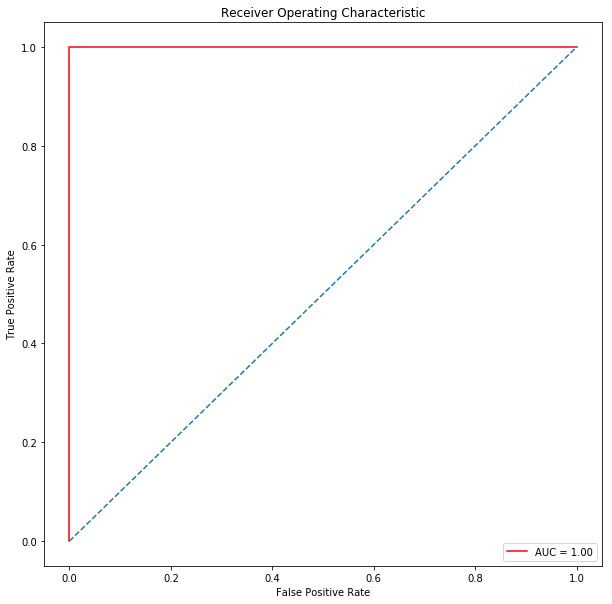

In [26]:
y_prob1 = model_LR.predict_proba(X_test)[:,1] # Yield positive class prediction probabilities  
y_pred1 = np.where(y_prob1 > 0.5, 1, 0) # Threshold of the probabilities : to give class predictions
model_LR.score(X_test, y_pred1)

# perform confusion matrix calculation
confusion_matrix=metrics.confusion_matrix(y_test,y_pred1)
print(confusion_matrix)

# find roc, auc score
auc_roc=metrics.roc_auc_score(y_test,y_pred1)
print(auc_roc)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

# import matplotlib and plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [27]:
logreg = LogisticRegression(C=1, random_state=0) # define "empty" model
2
logreg.fit(X_train, y_train) # fit model with given training data

# print coefficients of fitted logistic regression model
print('Coefficient of the features in the decision function:\n', logreg.coef_)
print()
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test) 
print(classification_report(y_test, y_pred, target_names=target_name))
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

Coefficient of the features in the decision function:
 [[ 0.02067212  0.03194689 -0.00352284 ... -0.03628061  0.02429898
  -0.10322533]]

             precision    recall  f1-score   support

          p       1.00      1.00      1.00      1061
          e       1.00      1.00      1.00       970

avg / total       1.00      1.00      1.00      2031

[[1061    0]
 [   0  970]]


## Step 10: Decision Tree Classifier 

In [28]:
# import decision tree classifier function
# import gridsearchcv

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=42),param_grid={'max_depth': range(1, 8)}, cv=5, return_train_score=True)
grid.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 8)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.557508         0.006653         0.889874          0.889874   
1       0.839751         0.007378         0.926145          0.926145   
2       0.791208         0.006174         0.960446          0.961554   
3       0.795508         0.005984         0.988347          0.988183   
4       0.840821         0.006545         0.999344          0.999508   
5       0.834679         0.005777         1.000000          1.000000   
6       0.851964         0.006369         1.000000          1.000000   

  param_max_depth            params  rank_test_score  split0_test_score  \
0               1  {'max_depth': 1}                7           0.886066   
1               2  {'max_depth': 2}                6           0.924590   
2               3  {'max_depth': 3}                5           0.955738   
3               4  {'max_depth': 4}                4           0.987705   
4               5  {'max_depth': 5}             

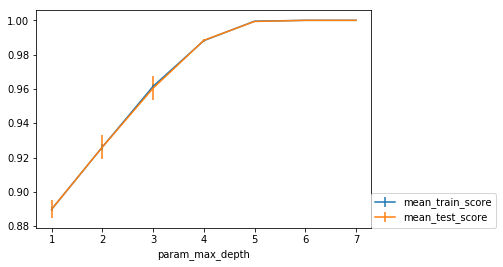

In [29]:
# import matplotlib
# find optimal max depth, and see the train and test results on plot

% matplotlib inline
import matplotlib.pyplot as plt
scores = pd.DataFrame(grid.cv_results_)
print(scores)
scores.plot(x='param_max_depth', y='mean_train_score',
yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score',
yerr='std_test_score', ax=plt.gca())
plt.legend(loc=(1, 0))
plt.show()

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.806038         0.006682         0.889874          0.889874   
1        0.743141         0.006166         0.917118          0.917118   
2        0.792226         0.006140         0.949943          0.949943   
3        0.751234         0.006099         0.965534          0.968406   
4        0.898201         0.007380         0.982767          0.982767   
5        0.868902         0.007109         0.993763          0.993763   
6        0.811175         0.005840         0.995240          0.996348   
7        0.792747         0.005607         0.998195          0.998482   
8        0.827729         0.005933         0.999344          0.999508   
9        0.830166         0.006001         0.999344          0.999508   
10       0.948858         0.006801         1.000000          1.000000   
11       0.833809         0.005471         1.000000          1.000000   
12       0.885340         0.006122         1.000000

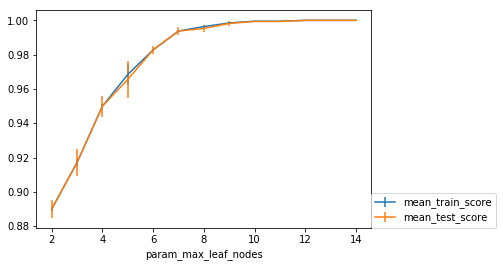

In [30]:
#maximum number of nodes from the root node of the tree. 
#Once a maximum depth of the tree is met, we must stop splitting adding new nodes. 
#Deeper trees are more complex and are more likely to overfit the training data.

grid = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=0), param_grid={'max_leaf_nodes': range(2, 15)}, cv=5, return_train_score=True)
grid.fit(X_train_scaler, y_train)
scores = pd.DataFrame(grid.cv_results_)
print(scores)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score',
yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score',
yerr='std_test_score', ax=plt.gca())
plt.legend(loc=(1, 0))
plt.show()

## Confusion Matrix with Best Estimator

In [32]:
# show classification report and confusion matrix from using best estimator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = grid.best_estimator_.predict(X_test_scaler)

from sklearn.metrics import confusion_matrix, classification_report
print(grid.best_estimator_)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, grid.best_estimator_.predict(X_test_scaler)))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=12,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1061
          1       1.00      1.00      1.00       970

avg / total       1.00      1.00      1.00      2031

[[1061    0]
 [   0  970]]


## Decision Tree from Best Estimator

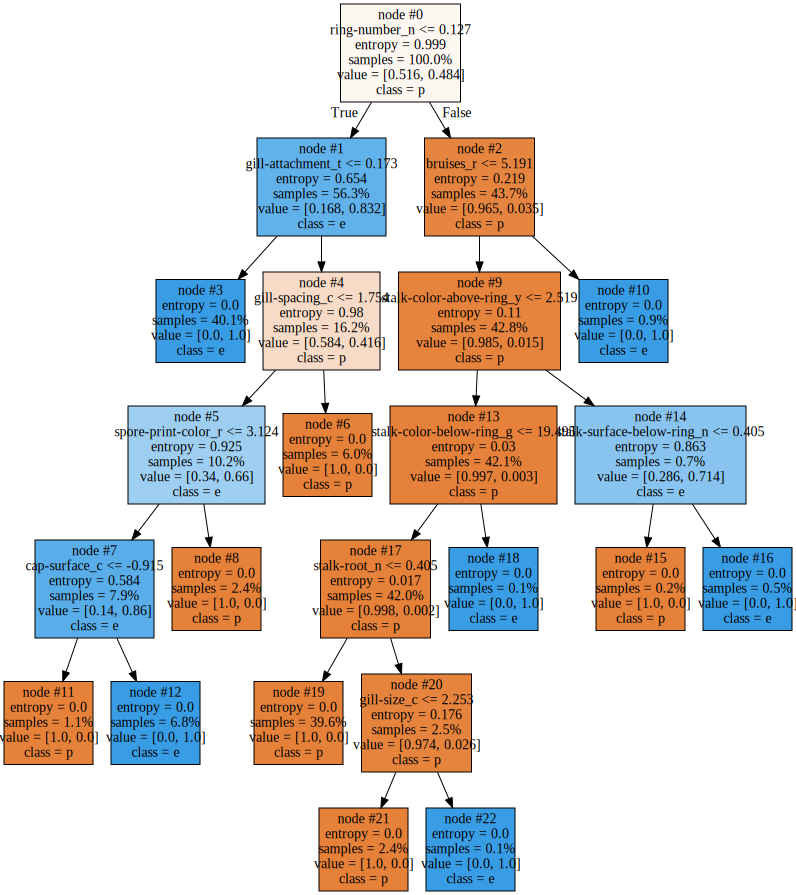

In [33]:
# import graphviz to visualize decision tree using best estimator

from sklearn.tree import export_graphviz
tree_dot = export_graphviz(grid.best_estimator_, out_file=None, feature_names=feature_namess, class_names=target_name.astype(str), filled=True, node_ids=True,
proportion=True, impurity=True)
import graphviz
graph = graphviz.Source(tree_dot)
graph.render('best_estimator', cleanup=True)
graph

Feature importances ranking:
53.58% feature 642: ring-number_n 
20.94% feature 451: gill-attachment_t 
 6.45% feature 1154: gill-spacing_c 
 4.88% feature 1221: spore-print-color_r 
 4.86% feature 2122: bruises_r 
 4.59% feature 728: cap-surface_c 
 2.82% feature 1375: stalk-color-above-ring_y 
 0.60% feature 795: stalk-surface-below-ring_n 
 0.58% feature 189: stalk-color-below-ring_g 
 0.44% feature 2331: gill-size_c 
 0.27% feature 791: stalk-root_n 
 0.00% feature 815: cap-shape_e 
 0.00% feature 856: bruises_o 
 0.00% feature 810: population_b 
 0.00% feature 862: odor_b 
 0.00% feature 861: bruises_y 
 0.00% feature 860: bruises_w 
 0.00% feature 859: bruises_u 
 0.00% feature 858: bruises_r 
 0.00% feature 857: bruises_p 
 0.00% feature 855: bruises_n 
 0.00% feature 864: odor_g 
 0.00% feature 854: bruises_k 
 0.00% feature 853: bruises_h 
 0.00% feature 852: bruises_g 
 0.00% feature 851: bruises_e 
 0.00% feature 850: bruises_b 
 0.00% feature 849: cap-color_y 
 0.00% feature

 0.00% feature 1116: spore-print-color_e 
 0.00% feature 1115: ring-type_t 
 0.00% feature 1114: ring-type_e 
 0.00% feature 1113: ring-number_t 
 0.00% feature 1111: veil-color_t 
 0.00% feature 1103: stalk-surface-below-ring_t 
 0.00% feature 1110: veil-color_e 
 0.00% feature 1109: veil-type_t 
 0.00% feature 1108: veil-type_e 
 0.00% feature 1107: stalk-color-below-ring_t 
 0.00% feature 1106: stalk-color-below-ring_e 
 0.00% feature 1105: stalk-color-above-ring_t 
 0.00% feature 1104: stalk-color-above-ring_e 
 0.00% feature 1083: cap-color_t 
 0.00% feature 1081: cap-surface_t 
 0.00% feature 1043: spore-print-color_e 
 0.00% feature 1052: spore-print-color_w 
 0.00% feature 1059: population_n 
 0.00% feature 1058: population_k 
 0.00% feature 1057: population_h 
 0.00% feature 1056: population_g 
 0.00% feature 1055: population_e 
 0.00% feature 1054: population_b 
 0.00% feature 1053: spore-print-color_y 
 0.00% feature 1051: spore-print-color_u 
 0.00% feature 1061: population

 0.00% feature 64: stalk-root_s 
 0.00% feature 63: stalk-root_k 
 0.00% feature 62: stalk-root_f 
 0.00% feature 61: stalk-root_c 
 0.00% feature 40: gill-spacing_s 
 0.00% feature 38: gill-spacing_f 
 0.00% feature 78: stalk-color-above-ring_b 
 0.00% feature 9: cap-surface_k 
 0.00% feature 16: cap-color_s 
 0.00% feature 15: cap-color_k 
 0.00% feature 14: cap-color_f 
 0.00% feature 13: cap-color_c 
 0.00% feature 12: cap-color_b 
 0.00% feature 11: cap-surface_x 
 0.00% feature 10: cap-surface_s 
 0.00% feature 8: cap-surface_f 
 0.00% feature 18: bruises_b 
 0.00% feature 7: cap-surface_c 
 0.00% feature 6: cap-surface_b 
 0.00% feature 5: cap-shape_x 
 0.00% feature 4: cap-shape_s 
 0.00% feature 3: cap-shape_k 
 0.00% feature 2: cap-shape_f 
 0.00% feature 1: cap-shape_c 
 0.00% feature 17: cap-color_x 
 0.00% feature 19: bruises_c 
 0.00% feature 37: gill-spacing_c 
 0.00% feature 29: odor_x 
 0.00% feature 36: gill-spacing_b 
 0.00% feature 35: gill-attachment_x 
 0.00% feat

 0.00% feature 579: stalk-root_n 
 0.00% feature 578: stalk-root_m 
 0.00% feature 577: stalk-root_l 
 0.00% feature 576: stalk-root_f 
 0.00% feature 575: stalk-root_c 
 0.00% feature 574: stalk-root_a 
 0.00% feature 572: stalk-shape_s 
 0.00% feature 582: stalk-root_y 
 0.00% feature 571: stalk-shape_p 
 0.00% feature 570: stalk-shape_n 
 0.00% feature 569: stalk-shape_m 
 0.00% feature 568: stalk-shape_l 
 0.00% feature 567: stalk-shape_f 
 0.00% feature 566: stalk-shape_c 
 0.00% feature 565: stalk-shape_a 
 0.00% feature 581: stalk-root_s 
 0.00% feature 583: stalk-surface-above-ring_a 
 0.00% feature 601: stalk-color-above-ring_a 
 0.00% feature 593: stalk-surface-below-ring_c 
 0.00% feature 600: stalk-surface-below-ring_y 
 0.00% feature 599: stalk-surface-below-ring_s 
 0.00% feature 598: stalk-surface-below-ring_p 
 0.00% feature 597: stalk-surface-below-ring_n 
 0.00% feature 596: stalk-surface-below-ring_m 
 0.00% feature 595: stalk-surface-below-ring_l 
 0.00% feature 594

 0.00% feature 1929: gill-attachment_n 
 0.00% feature 2088: habitat_n 
 0.00% feature 1987: cap-surface_l 
 0.00% feature 1986: cap-surface_f 
 0.00% feature 1985: cap-surface_e 
 0.00% feature 1984: cap-shape_p 
 0.00% feature 1983: cap-shape_n 
 0.00% feature 1982: cap-shape_l 
 0.00% feature 1981: cap-shape_f 
 0.00% feature 1980: cap-shape_e 
 0.00% feature 1979: habitat_t 
 0.00% feature 1978: habitat_o 
 0.00% feature 1977: habitat_n 
 0.00% feature 1976: population_t 
 0.00% feature 1975: population_o 
 0.00% feature 1974: population_n 
 0.00% feature 1973: spore-print-color_t 
 0.00% feature 1972: spore-print-color_o 
 0.00% feature 1971: spore-print-color_n 
 0.00% feature 1988: cap-surface_n 
 0.00% feature 1989: cap-surface_p 
 0.00% feature 1990: cap-color_e 
 0.00% feature 2000: odor_e 
 0.00% feature 2007: gill-attachment_l 
 0.00% feature 2006: gill-attachment_f 
 0.00% feature 2005: gill-attachment_e 
 0.00% feature 2004: odor_p 
 0.00% feature 2003: odor_n 
 0.00% fea

 0.00% feature 2281: habitat_k 
 0.00% feature 2273: population_n 
 0.00% feature 2280: habitat_h 
 0.00% feature 2279: habitat_b 
 0.00% feature 2278: population_y 
 0.00% feature 2277: population_w 
 0.00% feature 2276: population_u 
 0.00% feature 2275: population_r 
 0.00% feature 2274: population_o 
 0.00% feature 2330: gill-size_a 
 0.00% feature 2333: gill-size_s 
 0.00% feature 2411: population_s 
 0.00% feature 2383: veil-type_y 
 0.00% feature 2390: ring-number_a 
 0.00% feature 2389: veil-color_y 
 0.00% feature 2388: veil-color_v 
 0.00% feature 2387: veil-color_s 
 0.00% feature 2386: veil-color_n 
 0.00% feature 2385: veil-color_c 
 0.00% feature 2384: veil-color_a 
 0.00% feature 2382: veil-type_v 
 0.00% feature 2392: ring-number_n 
 0.00% feature 2381: veil-type_s 
 0.00% feature 2380: veil-type_n 
 0.00% feature 2379: veil-type_c 
 0.00% feature 2378: veil-type_a 
 0.00% feature 2377: stalk-color-below-ring_y 
 0.00% feature 2376: stalk-color-below-ring_v 
 0.00% feat

 0.00% feature 1426: cap-color_b 
 0.00% feature 1415: cap-shape_w 
 0.00% feature 1414: cap-shape_p 
 0.00% feature 1413: cap-shape_o 
 0.00% feature 1412: cap-shape_n 
 0.00% feature 1411: cap-shape_g 
 0.00% feature 1410: cap-shape_e 
 0.00% feature 1409: cap-shape_c 
 0.00% feature 1425: cap-surface_y 
 0.00% feature 1427: cap-color_c 
 0.00% feature 1407: habitat_y 
 0.00% feature 1437: bruises_e 
 0.00% feature 1444: odor_b 
 0.00% feature 1443: bruises_y 
 0.00% feature 1442: bruises_w 
 0.00% feature 1441: bruises_p 
 0.00% feature 1440: bruises_o 
 0.00% feature 1439: bruises_n 
 0.00% feature 1438: bruises_g 
 0.00% feature 1436: bruises_c 
 0.00% feature 1428: cap-color_e 
 0.00% feature 1435: bruises_b 
 0.00% feature 1434: cap-color_y 
 0.00% feature 1433: cap-color_w 
 0.00% feature 1432: cap-color_p 
 0.00% feature 1431: cap-color_o 
 0.00% feature 1430: cap-color_n 
 0.00% feature 1429: cap-color_g 
 0.00% feature 1408: cap-shape_b 
 0.00% feature 1406: habitat_s 
 0.00

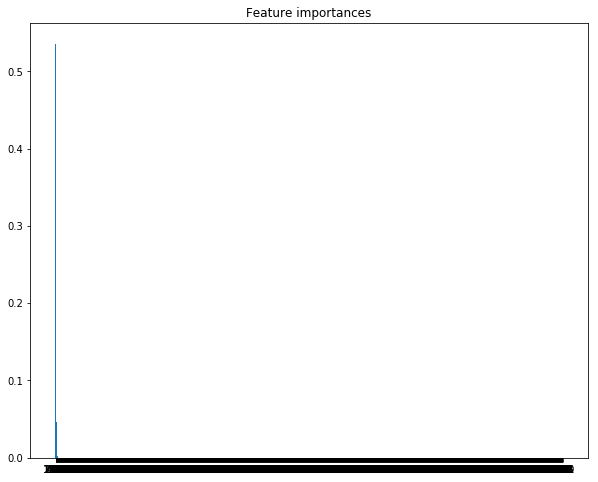

In [34]:
# Find feature importance
tree_dot = export_graphviz(grid.best_estimator_, out_file=None,
feature_names=feature_namess,
class_names=target_name.astype(str),
filled=True, node_ids=True,
proportion=True, impurity=True)
graph = graphviz.Source(tree_dot)
graph.render('best_estimator', cleanup=True)
graph
importances = grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importances ranking:")
for f in range(features.shape[1]):
  print('{0:.2f}%'.format(importances[indices[f]]*100).rjust(6, ' '),
      'feature %d: %s ' % (indices[f], feature_namess[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices], align="center")
plt.xticks(range(features.shape[1]), indices)
plt.show()

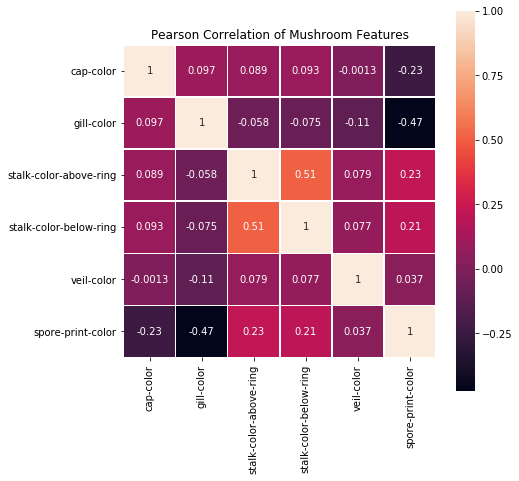

In [36]:
# Pearson correlation

import seaborn as sns 
import matplotlib.pyplot as plt

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Pearson Correlation of Mushroom Features')

# Draw heatmap using seaborn
sns.heatmap(data_color.astype(float).corr(),linewidths=0.5,vmax=1.0, square=True, annot=True)

## Average AUC over depth range of 1-12

max_depth =  1, mean_auc = 0.8924, std_auc = 0.0050
max_depth =  2, mean_auc = 0.9795, std_auc = 0.0035
max_depth =  3, mean_auc = 0.9931, std_auc = 0.0010
max_depth =  4, mean_auc = 0.9979, std_auc = 0.0002
max_depth =  5, mean_auc = 1.0000, std_auc = 0.0000
max_depth =  6, mean_auc = 1.0000, std_auc = 0.0000
max_depth =  7, mean_auc = 1.0000, std_auc = 0.0000
max_depth =  8, mean_auc = 1.0000, std_auc = 0.0000
max_depth =  9, mean_auc = 1.0000, std_auc = 0.0000
max_depth = 10, mean_auc = 1.0000, std_auc = 0.0000
max_depth = 11, mean_auc = 1.0000, std_auc = 0.0000


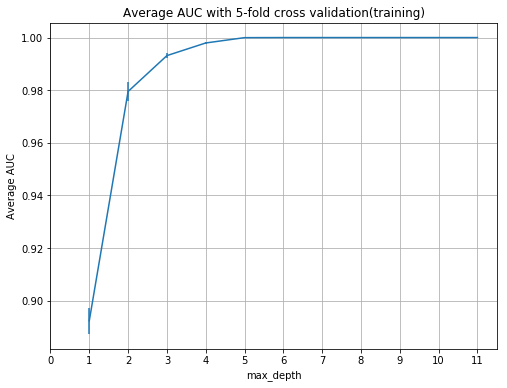

In [37]:
# find average AUC score from range 1-12
# use cross validation score function to test model’s ability to predict new data that weren’t used in estimating it

from sklearn.model_selection import cross_val_score
mean_auc, std_auc = [], []
for val in range(1, 12):
    clf = DecisionTreeClassifier(criterion='entropy',
    max_depth=val, random_state=42)
    scores = cross_val_score(clf, X_train_scaler, y_train, cv=5, scoring='roc_auc')

    print('max_depth = {:2d}, mean_auc = {:>5.4f}, std_auc = {:.4f}'.format(val, np.mean(scores), np.std(scores)))
    mean_auc.append(np.mean(scores))
    std_auc.append(np.std(scores))
fig, ax = plt.subplots(figsize=(8, 6))
plt.errorbar(x=range(1, 12), y=mean_auc, yerr=std_auc)
plt.xlabel('max_depth')
ax.set_xticks(range(0, 12, 1))
plt.ylabel('Average AUC')
plt.title('Average AUC with 5-fold cross validation(training)')
plt.grid(True)
plt.show()

In [38]:
# perform linear SVC

from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import LinearSVC

ParameterC = [0.01, 0.1, 1, 10, 100, 500, 1000]

mean_auc = [] 
std_auc = []
score_recall = []


for c in ParameterC:
    clf2 = LinearSVC(random_state=0, C=c)
    a = cross_val_score(clf,X_train,y_train,cv=5, scoring='roc_auc', n_jobs=4)
    mean_auc.append(a.mean()) 
    std_auc.append(a.std())
 
    
    y_pred = clf2.fit(X_train, y_train).predict(X_test)
    score_recall.append(recall_score(y_test, y_pred))
print(score_recall)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


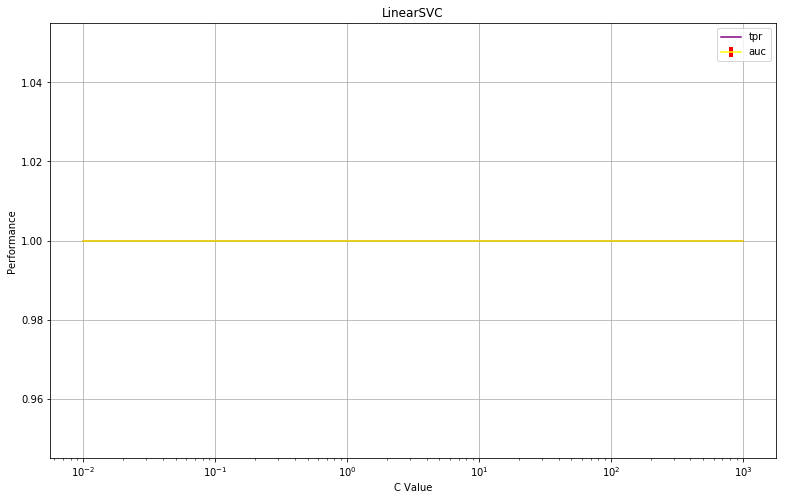

In [39]:
# test performance of LinearSVC, visualize on plot

from matplotlib import pyplot as plt
plt.figure(figsize=(13,8))

plt.xlabel('C Value')
plt.ylabel("Performance")
plt.grid()

plt.errorbar(ParameterC, mean_auc, yerr = std_auc, color = 'yellow',
            ecolor = 'red', elinewidth=4, capsize=0, label='auc')
plt.xscale('log')
plt.plot(ParameterC, score_recall, color = 'purple', label='tpr')
plt.title("LinearSVC")
plt.legend()
plt.show()

## Linear SVC vs RBF (Turn a linear learner into a non-linear learner)


In [40]:
# Use RBF kernel to compare with LinearSVC, using auto setting for gamma

from sklearn import svm
model = svm.SVC(kernel='rbf',gamma='auto',C=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [30]:
# Use RBF kernel to compare with LinearSVC, using 0.3 setting for gamma

from sklearn import svm
model = svm.SVC(kernel='rbf',gamma=0.3,C=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

NameError: name 'X_train' is not defined

## Random Forest Classifier

In [36]:
# import RandomForestClassifier function
# import log_loss

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
rf = RandomForestClassifier(n_estimators=10, max_features=None, max_depth=None, min_samples_leaf=1, oob_score=True)
rf.fit(X_train, y_train.reshape(-1, 1))
proba = rf.predict_proba(X_test)
print('Test Set Logloss =', log_loss(y_test, proba))
pred = rf.predict(X_test)
print(classification_report(y_test, pred, target_names=target_name)) #print classification report

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Test Set Logloss = 9.992007221626413e-16
             precision    recall  f1-score   support

          p       1.00      1.00      1.00      1061
          e       1.00      1.00      1.00       970

avg / total       1.00      1.00      1.00      2031



/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [1]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
ypred1 = model.predict(X_test)

NameError: name 'X_train' is not defined

In [37]:
from sklearn import metrics
print(metrics.classification_report(ypred1, y_test))

NameError: name 'ypred1' is not defined

## Models' Evaluation

In [31]:
# compare accuracy across four classification methods for supervised learning

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(probability=True)))
models.append(('RF', RandomForestClassifier()))


from collections import defaultdict
from sklearn.metrics import roc_auc_score

model_predictions = defaultdict()
model_score = defaultdict(np.float)
for name, model in models:
    model.fit(X_train, y_train)
    my_pred = model.predict(X_test)
    model_predictions[name] = my_pred
    model_score[name] = roc_auc_score(y_test, my_pred)

    msg = "%s: %f" % (name, model_score[name])
    print(msg) 


NameError: name 'X_train' is not defined